In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris

In [6]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [7]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
X.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [61]:
from sklearn.preprocessing import StandardScaler

sca = StandardScaler().set_output(transform='pandas')

X = sca.fit_transform(X)

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = []

log_reg = LogisticRegression(solver='liblinear', multi_class='ovr')
models.append((log_reg, 'Logistic Regression'))

kneighbors = KNeighborsClassifier()
models.append((kneighbors, 'K Neighbors'))

dtree = DecisionTreeClassifier()
models.append((dtree, 'Decision Tree'))

randforest = RandomForestClassifier()
models.append((randforest, 'Random Forest'))

svc = SVC()
models.append((svc, 'SVM'))

nbayes = GaussianNB()
models.append((nbayes, 'Naive Bayes'))



In [64]:
for model in models:
    model[0].fit(X_train, y_train)


/Users/koa/Documents/ML Course/iris_classification/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [65]:
model_preds = []
for model in models:
    y_pred = model[0].predict(X_test)
    model_preds.append(y_pred)

accuracy_scores = []

from sklearn.metrics import confusion_matrix
for model_idx in range(len(models)):
    print(models[model_idx][0],'\n' ,confusion_matrix(y_test,model_preds[model_idx]))
    accuracy_scores.append(models[model_idx][0].score(X_test,y_test))
    


    


LogisticRegression(multi_class='ovr', solver='liblinear') 
 [[6 1 0]
 [0 5 7]
 [0 3 8]]
KNeighborsClassifier() 
 [[ 7  0  0]
 [ 0 12  0]
 [ 0  3  8]]
DecisionTreeClassifier() 
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
RandomForestClassifier() 
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
SVC() 
 [[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
GaussianNB() 
 [[7 0 0]
 [0 9 3]
 [0 2 9]]


In [66]:
print(accuracy_scores)

[0.6333333333333333, 0.9, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8333333333333334]


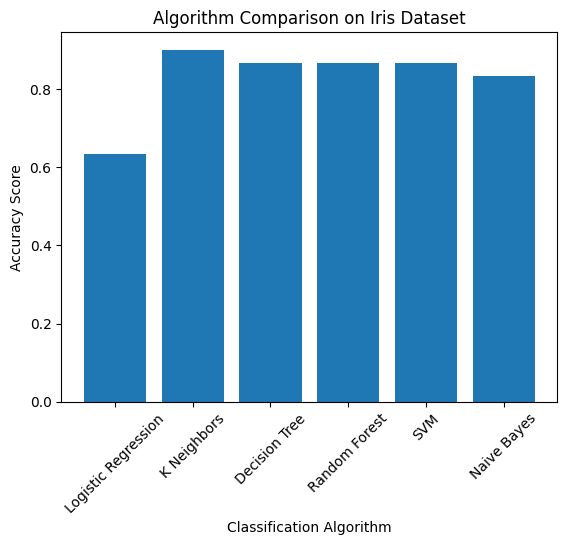

In [67]:
import matplotlib.pyplot as plt



names = []
for model in models:
    names.append(model[1])

plt.title('Algorithm Comparison on Iris Dataset')
plt.xlabel('Classification Algorithm')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)

plt.bar(names, accuracy_scores)

plt.show()